# Background Information

#### Main Target
 - Investigate whether there are differences across the product lines with respect to customer characteristics.

#### Stakeholder
 -  AdRight market research team

#### Objective 
 - Descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line
 - Apply the analyise in generating and guiding marketing strategy, 

<br>

#### Dataset
The data is collected on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months and stored in the **CardioGoodFitness.csv** file. Data related to the following customer variables is collected: 

- product purchased (TM195, TM498, or TM798)
- gender; 
- age (in years)
- education (in years)
- relationship status (single or partnered)
- annual household income (in dollar)
- average number of times the customer plans to use the treadmill each week
- average number of miles the customer expects to walk/run each week
- self-rated fitness on an 1-to-5 scale (where 1 is poor shape and 5 is excellent shape)

#### Study Directions
- Compare sales data of the products
- Compare the characteristics of the customer (include personal information and expectation towards treadmill
- Exmine relation bewtween customer's characteristics and the products
 <br>

# Environment set-up and understand the data

In [1]:
# input libraries

import numpy as np 
import pandas as pd 
import re

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv


In [2]:
CGF = pd.read_csv("/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv")

In [3]:
CGF.shape

(180, 9)

##### Notes:
CGF Dataset includes 180 observations.

In [4]:
CGF.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
CGF.rename(columns={'MaritalStatus':'Marital_Status',
                    'Usage':'Treadmill_Usage',
                    'Fitness':'Self-rated_Fitness',
                    'Income':'Annual_Income'},inplace=True)

In [6]:
CGF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             180 non-null    object
 1   Age                 180 non-null    int64 
 2   Gender              180 non-null    object
 3   Education           180 non-null    int64 
 4   Marital_Status      180 non-null    object
 5   Treadmill_Usage     180 non-null    int64 
 6   Self-rated_Fitness  180 non-null    int64 
 7   Annual_Income       180 non-null    int64 
 8   Miles               180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


##### Notes:
- Data in string type: **"Product", "Gender", "Marital_Status"** 
- Data in integer type: **"Age", "Education", "Treadmill_Usage", "Self-rated_Fitness", "Annual_Income", "Miles"**


In [7]:
CGF.isna().any()

Product               False
Age                   False
Gender                False
Education             False
Marital_Status        False
Treadmill_Usage       False
Self-rated_Fitness    False
Annual_Income         False
Miles                 False
dtype: bool

In [8]:
CGF.duplicated().any()

False

##### Notes:
There is no missing or duplicated data in the dataset.

# Data Prepocessing

In [9]:
CGF.groupby("Product")["Annual_Income"].agg(["mean","min","max","count"])

,mean,min,max,count
Product,,,,
TM195,46418.025,29562,68220,80
TM498,48973.650,31836,67083,60
TM798,75441.575,48556,104581,40


In [10]:
CGF.describe(include="all")

,Product,Age,Gender,Education,Marital_Status,Treadmill_Usage,Self-rated_Fitness,Annual_Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


##### Notes:
- Age of customers from 18 to 50, with mean = 28.79
- Customer plan to use Treadmill 2 to 7 times per week.
- Customer expect to run/walk on the Treadmill 21 to 360 km per week.
- Average self-rated fitness is 3.31, normal.
- Annual Income of customers from 16.5K to 104.5K, with mean = 53.7K.


#### Gender distribution in products

In [11]:
CGF["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [12]:
Genderdist = CGF.groupby(["Product","Gender"])["Gender"].count()
TotalList = CGF.groupby("Product")["Gender"].count()
Gender_dist = round(Genderdist/TotalList*100)
print(Gender_dist)

Product  Gender
TM195    Female    50.0
         Male      50.0
TM498    Female    48.0
         Male      52.0
TM798    Female    18.0
         Male      82.0
Name: Gender, dtype: float64


##### Notes:
- The best-selling treadmill is TM195.
- Male customers buying treadmill more than female customers, while **half of TM195 customers is female**.
- Married customer buying Treadmill more than Single customers.


# Anaylsis with Visualization 

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('ticks')
sns.set(rc={'figure.figsize':(15,10)})

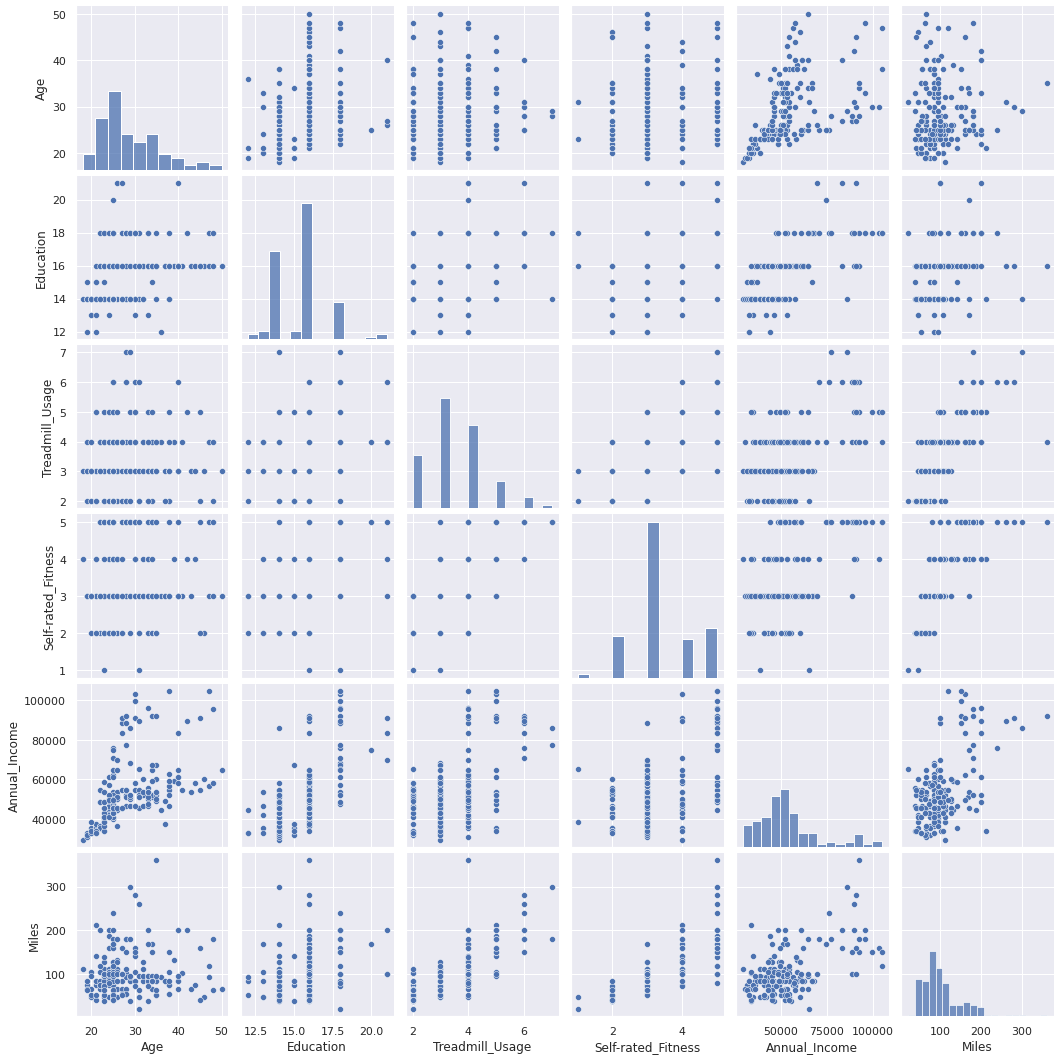

In [14]:
sns.pairplot(data=CGF)

[Text(0.5, 1.0, 'Customers Married Status by Gender')]

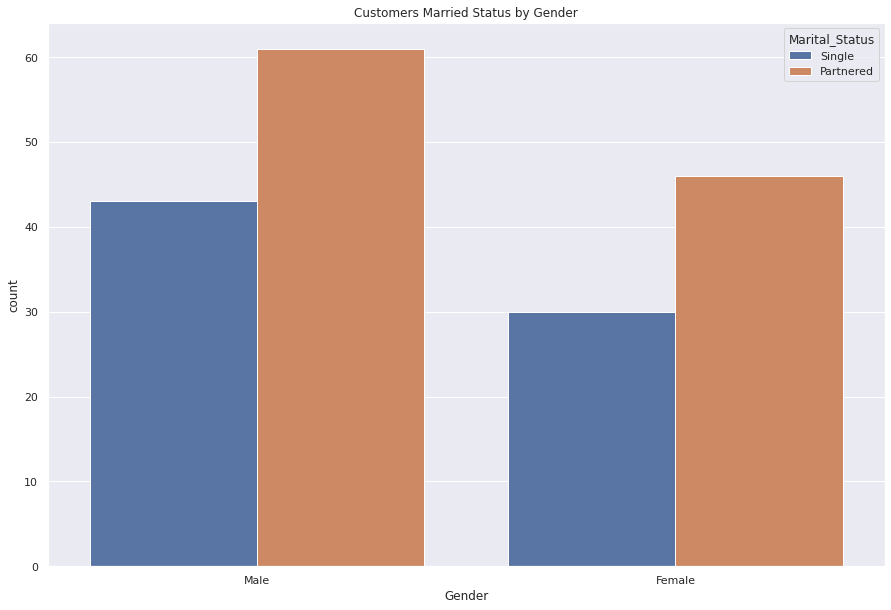

In [15]:
sns.countplot(x="Gender",hue="Marital_Status",data=CGF).set(title = "Customers Married Status by Gender")

[Text(0.5, 1.0, 'Customers Married Status by Products')]

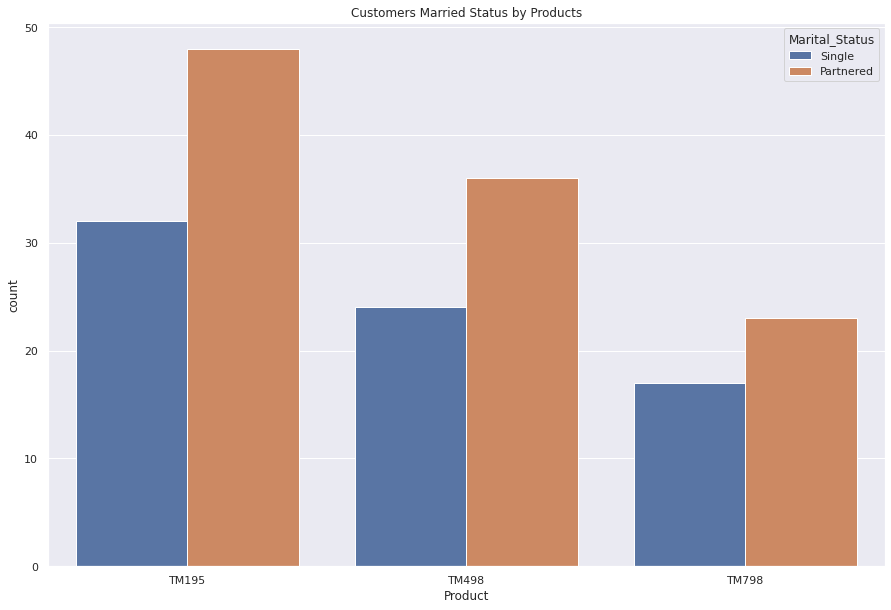

In [16]:
sns.countplot(x="Product",hue="Marital_Status",data=CGF).set(title = "Customers Married Status by Products")

[Text(0.5, 1.0, 'Age by Annual_Income in Gender')]

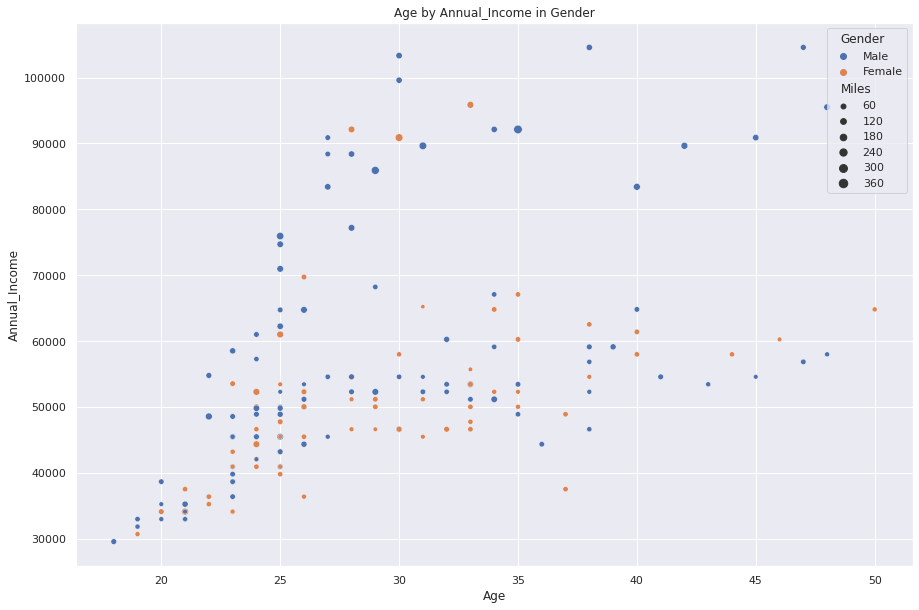

In [17]:
sns.scatterplot(x="Age",y="Annual_Income",hue="Gender",data=CGF, size="Miles" ).set(title = "Age by Annual_Income in Gender")

[Text(0.5, 1.0, 'Annual Income by Age in Product')]

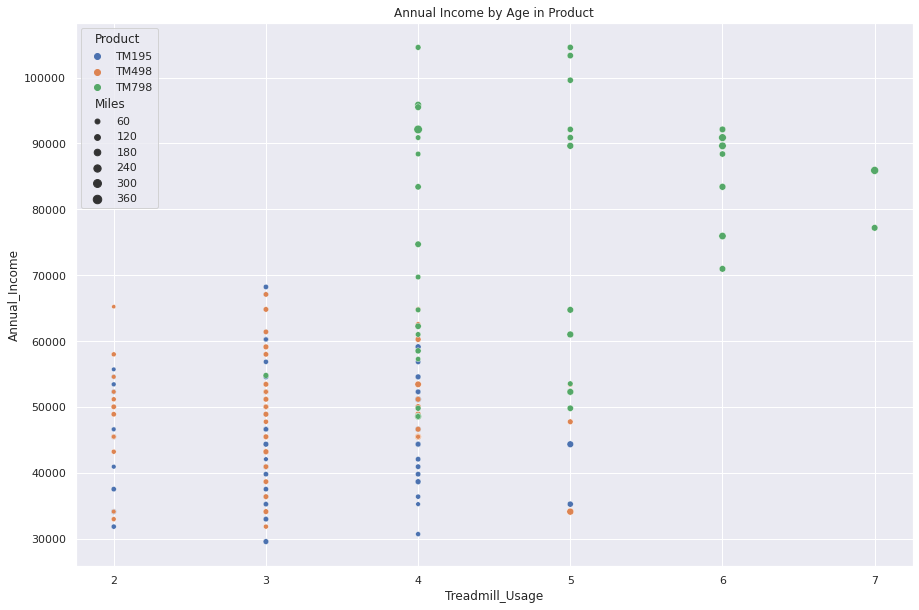

In [18]:
sns.scatterplot(x="Treadmill_Usage",y="Annual_Income",hue="Product",data=CGF, size = "Miles" ).set(title = "Annual Income by Age in Product")

[Text(0.5, 1.0, 'Miles by Age in Gender')]

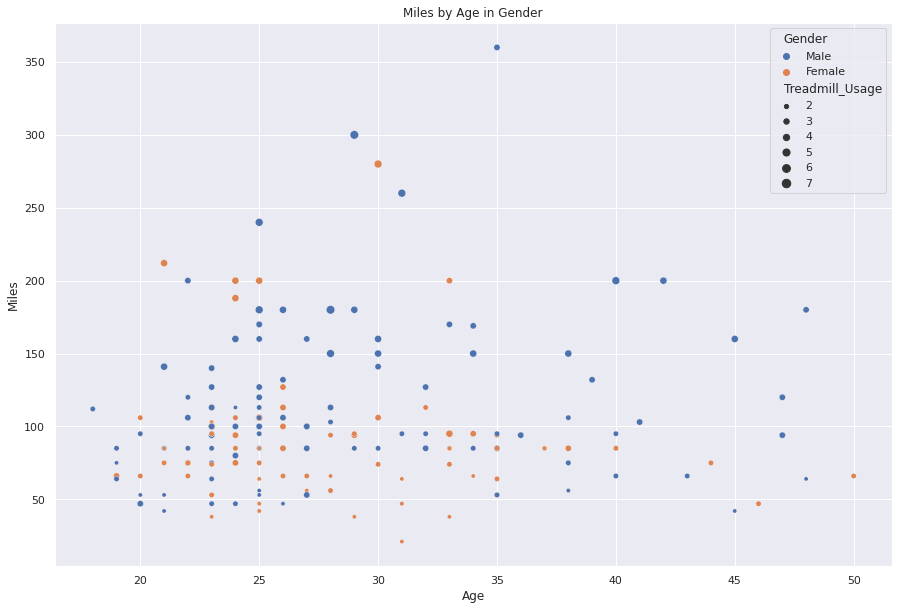

In [19]:
sns.scatterplot(x="Age",y="Miles",hue="Gender",data=CGF, size="Treadmill_Usage").set(title = "Miles by Age in Gender")

[Text(0.5, 1.0, 'Miles by rated_Fitness in Gender')]

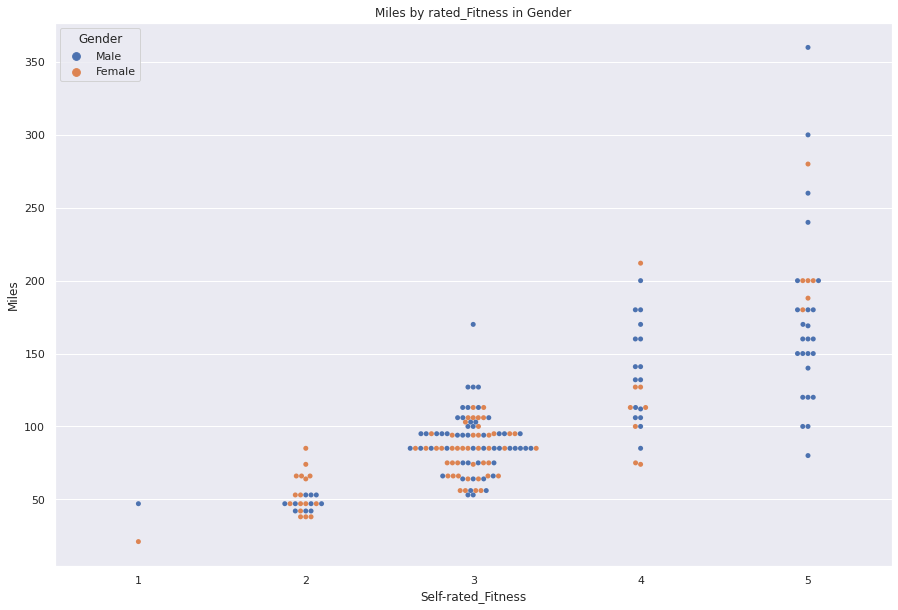

In [20]:
sns.swarmplot(x="Self-rated_Fitness",y="Miles",hue="Gender",data=CGF).set(title = "Miles by rated_Fitness in Gender")

<AxesSubplot:>

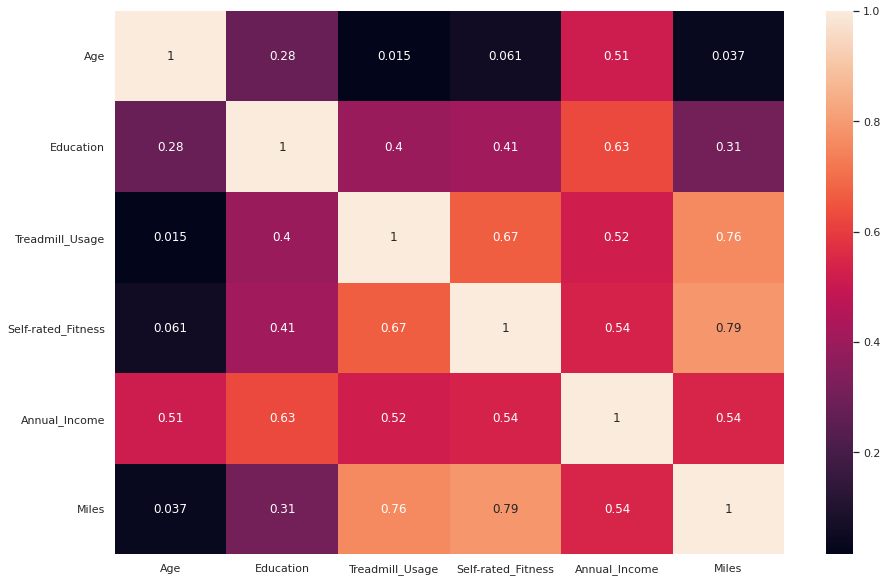

In [21]:
CGF_corr = CGF.corr()
sns.heatmap(CGF_corr,annot=True)

# Important Observations

There is a strong correlation between:
- average number of times the customer plans to use the treadmill each week and the average number of miles the customer expects to walk/run each week, and 
- self-rated Fitness and an average number of miles the customer expects to walk/run each week.


## Customer Profiles of Models
- There are **more male customers buying treadmills than female customers in general**.
- In Marital status, it shows that there are **more married customers than single customers in all three products**.
- **Male customers with a high annual income tend to use the treadmill more.**
- Customers of TM798 tend to run more than customers of the other 2 products.
- Generally, male customers run more than female customers in most of the age.
- **Customers with higher income tend to choose TM798** and plan to use the treadmill more often each week.
- positive relationship between the average number of times the customer plans to use the treadmill each week and self-rated fitness score, **customers who plan to use treadmill more, rate higher in the self-rated fitness score**, while most of the data grouped in score 3

<br>


#### TM195
- TM195 is **the best-selling product**, the mean of the customers who bought TM195 is 46.4K.
- The **only** product that has an equal distribution in customer's gender.


#### TM498
- TM498 is the second best-selling product, the mean of the customers who bought TM498 is 48.9K.
- **Customers characteristics of TM498 is similar to TM195**, which can be observed from Annual Income by Age in Product


#### TM798
- The sales numbers of TM798 record the **least**, but with the **highest mean, 75K, in the annual income of customers**, seems like the high-income group prefers this model more than others.
- Most unequal gender distribution rate as **only 18% of customers of TM798 are female**.

# Recommendations

 
From the customers’ characteristics of each product, **we can observe that TM798 has the Middle class with active use of the treadmill, and customers of TM197 and TM498 share another similar group of characteristics**. I will recommend **an enhancement in the function/ clear market position for TM498, in order to target the group between TM197 and TM798**. And get all 3 products targeting different groups of customers.